# Explore here

It's recommended to use this notebook for exploration purposes.

In [20]:
import requests
import time

url = " https://es.wikipedia.org/wiki/Leucocito"
html_data = requests.get(url, time.sleep(10)).text


html_data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Leucocito - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fea

In [21]:
from bs4 import BeautifulSoup
import pandas as pd

soup = BeautifulSoup(html_data,"html.parser")
soup

tables = soup.find_all("table",class_="wikitable")

dfs = pd.read_html(str(tables))



In [22]:
print(dfs)

[         Tipo  Apariencia microscópica  Diagrama  \
0  Neutrófilo                      NaN       NaN   
1  Eosinófilo                      NaN       NaN   
2    Basófilo                      NaN       NaN   
3   Linfocito                      NaN       NaN   
4    Monocito                      NaN       NaN   

  Porcentaje aproximado en adultos  \
0                              62%   
1                             2.3%   
2                             0.4%   
3                              30%   
4                             5.3%   

                                       Diámetro (μm)  \
0                                              10-12   
1                                              10-12   
2                                              12-15   
3  Linfocitos pequeños: 7–8 Linfocitos grandes: 1...   
4                                          12-15[8]​   

                             [7]​ Principal objetivo  \
0                             Bacterias Hongos Virus   
1  Macro

In [23]:
import sqlite3

connection = sqlite3.connect("Leucocito.db")
connection

In [ ]:
cursor = connection.cursor()
cursor.execute("""
    CREATE TABLE celulas (
        Tipo TEXT,
        Apariencia_microscopica TEXT,
        Diagrama TEXT,
        Porcentaje_aproximado_adultos TEXT,
        Diametro_um TEXT,
        Principal_objetivo TEXT,
        Nucleo TEXT,
        Granulos TEXT,
        Vida_media TEXT
    )
""")

In [30]:
leucocito_tuples = []


for df in dfs:
    leucocito_tuples.extend(df.to_records(index=False))

leucocito_tuples[:5]

[('Neutrófilo', nan, nan, '62%', '10-12', 'Bacterias Hongos Virus', 'Multilobulado', 'Fino, ligeramente rosado (tinción HyE)', '6 horas-unos cuantos días, dura días en bazo y otros tejidos.'),
 ('Eosinófilo', nan, nan, '2.3%', '10-12', 'Macroparásitos Modulan respuesta alérgica inflamatoria', 'Bi-lobulado', 'Se encuentran en un color rosa-anaranjado', '8–12 días; circulan por 4 o 5 horas en el torrente sanguíneo.'),
 ('Basófilo', nan, nan, '0.4%', '12-15', 'Liberan histamina para respuesta inflamatoria', 'Bi-lobulado o tri-lobulado', 'Azul oscuro', 'De pocas horas hasta pocos días'),
 ('Linfocito', nan, nan, '30%', 'Linfocitos pequeños: 7–8 Linfocitos grandes: 12–15', 'Linfocitos B: libera anticuerpos y coopera para la activación de linfocitos T Linfocitos T: Inmunidad celular Células CD4 cooperadoras: activan y regulan linfocitos T y B. Células CD8 citotóxicas: destruyen células infectadas por virus y células tumorales por apoptosis. Células Tδ: funcionan como un puente entre la inmun

In [32]:
import sqlite3


cursor.executemany("""
    INSERT INTO celulas 
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
""", leucocito_tuples)


connection.commit()



In [33]:
for row in cursor.execute("SELECT * FROM celulas"):
    print(row)

('Neutrófilo', None, None, '62%', '10-12', 'Bacterias Hongos Virus', 'Multilobulado', 'Fino, ligeramente rosado (tinción HyE)', '6 horas-unos cuantos días, dura días en bazo y otros tejidos.')
('Eosinófilo', None, None, '2.3%', '10-12', 'Macroparásitos Modulan respuesta alérgica inflamatoria', 'Bi-lobulado', 'Se encuentran en un color rosa-anaranjado', '8–12 días; circulan por 4 o 5 horas en el torrente sanguíneo.')
('Basófilo', None, None, '0.4%', '12-15', 'Liberan histamina para respuesta inflamatoria', 'Bi-lobulado o tri-lobulado', 'Azul oscuro', 'De pocas horas hasta pocos días')
('Linfocito', None, None, '30%', 'Linfocitos pequeños: 7–8 Linfocitos grandes: 12–15', 'Linfocitos B: libera anticuerpos y coopera para la activación de linfocitos T Linfocitos T: Inmunidad celular Células CD4 cooperadoras: activan y regulan linfocitos T y B. Células CD8 citotóxicas: destruyen células infectadas por virus y células tumorales por apoptosis. Células Tδ: funcionan como un puente entre la inmu

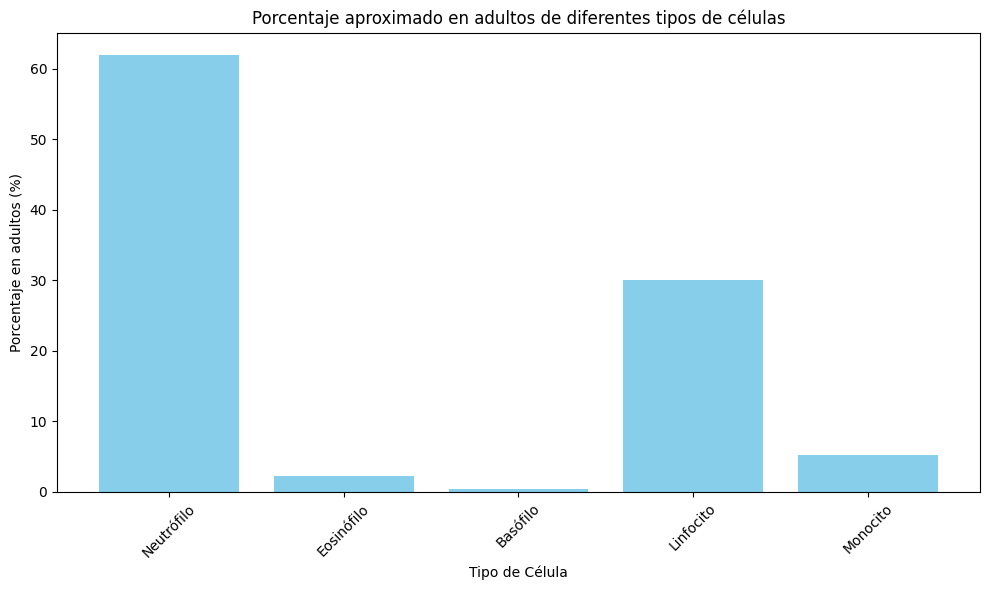

In [34]:
import matplotlib.pyplot as plt

# Datos
tipos_celulas = ["Neutrófilo", "Eosinófilo", "Basófilo", "Linfocito", "Monocito"]
porcentajes = [62, 2.3, 0.4, 30, 5.3]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tipos_celulas, porcentajes, color='skyblue')
plt.xlabel('Tipo de Célula')
plt.ylabel('Porcentaje en adultos (%)')
plt.title('Porcentaje aproximado en adultos de diferentes tipos de células')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

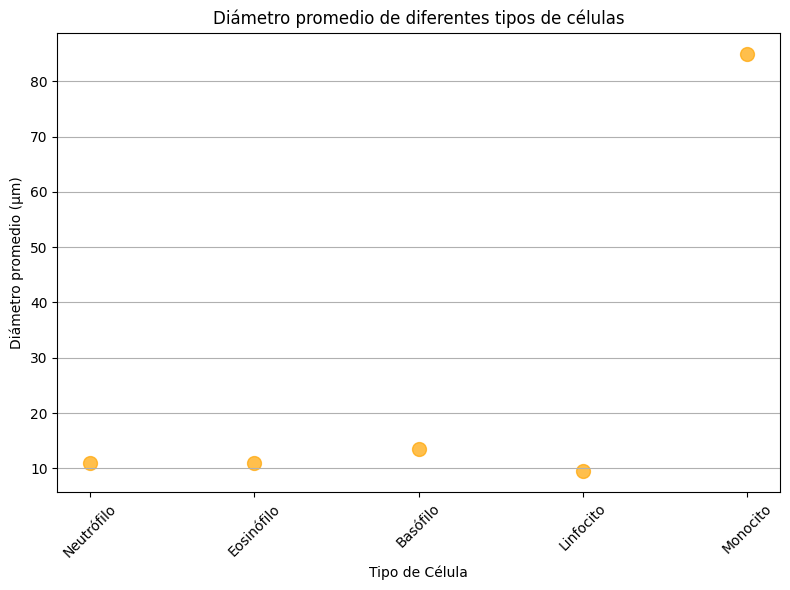

In [35]:
diametros = ["10-12", "10-12", "12-15", "7–8 y 12–15", "12-158"]

# Obtener el valor medio de los rangos de diámetro
diametros_promedio = [11, 11, 13.5, 9.5, 85]  # Valores aproximados

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(tipos_celulas, diametros_promedio, s=100, c='orange', alpha=0.7)
plt.xlabel('Tipo de Célula')
plt.ylabel('Diámetro promedio (μm)')
plt.title('Diámetro promedio de diferentes tipos de células')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

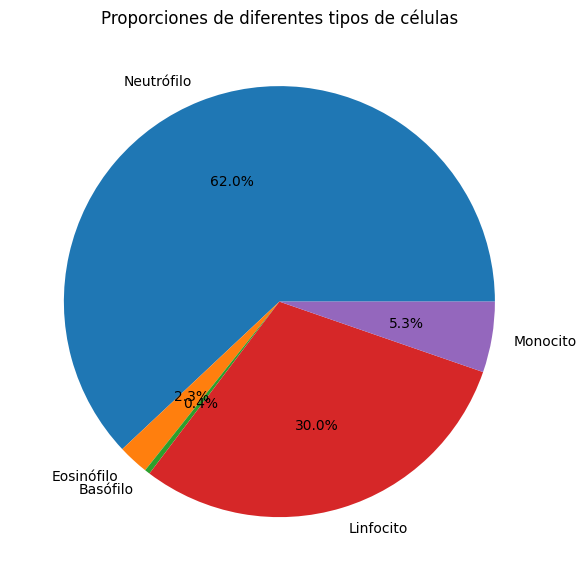

In [39]:
plt.figure(figsize=(6, 6))
plt.pie(porcentajes, labels=tipos_celulas, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('Proporciones de diferentes tipos de células')
plt.tight_layout()
plt.show()